In [1]:
# import libraries needed
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# sets the backend of matplotlib to the 'inline' backend:

# With the "%matplotlib inline" backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import our data from csv file as pandas df
# the file name is a user input (without the file type ".csv")
csv_file = input('Please enter the name of the .csv file (must be in the same path):\n')
raw_data = pd.read_csv('../../final project/datasets/' + str(csv_file) +'.csv')

# print the shape of our dataframe
print('Dataframe shape: rows, columns:') 
print(raw_data.shape)

# show the first 5 rows
print('Showing the first 5 rows of the dataframe:')
raw_data.head()

Please enter the name of the .csv file (must be in the same path):
 USArrests


Dataframe shape: rows, columns:
(50, 5)
Showing the first 5 rows of the dataframe:


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Enter x axis label: Murder
Enter y axis label: Assault


x axis label is: Murder
y axis label is: Assault


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

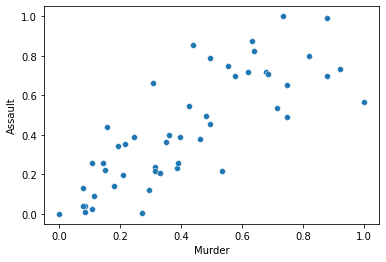

In [3]:
# manual input of label/header for x, y axes from user
x_axis = input('Enter x axis label:')
y_axis = input('Enter y axis label:')

print('x axis label is: ' + x_axis)
print('y axis label is: ' + y_axis)

# pick our dataset
X = raw_data[[x_axis, y_axis]]

# scale data -> otherwise k-means has issues
# method: fit_transform -> Fit to data, then transform it.
scaler = MinMaxScaler()
X[[x_axis, y_axis]] = scaler.fit_transform(X[[x_axis, y_axis]])
X.head()

# visualise data points of our dataframe
sns.scatterplot(data=X, x=x_axis, y=y_axis)

In [4]:
#######################################################################################################
#*******inertia calculator for diferent values of K -> stripped down code for faster iterations*******#
#######################################################################################################

def inertia():
    global X
    trials = int(input('Enter maximum number of clusters for the inertia calculation:\n'))
    elbow_list=[]
    K=1
    while K <= trials:
        centroids = (X.sample(n = K, random_state = 25))
        f = 1
        centr_shift = 1
        j = 0
        while centr_shift != 0:
            k=0
            for k in range(K):
                for ind, row in X.iterrows():
                    X.loc[ind, ('dist_centr_' + str(k))] = np.sqrt((row[x_axis] - centroids.iat[k,0])**2 + (row[y_axis] - centroids.iat[k,1])**2)
            k += 1
            distances = X.iloc[:, 2:2 + K].idxmin(axis = "columns")
            X = X.assign(min_dist = distances)
            new_centroids = X.groupby(['min_dist']).mean()[[x_axis, y_axis]]
            X2 = X
            X = X[X.columns[:-K-1]]
            f += 1
            if j == 0:
                centr_shift = 1
                j = j+1
            else:
                centr_shift = new_centroids[y_axis].sum() - centroids[y_axis].sum() + new_centroids[x_axis].sum() - centroids[x_axis].sum()
            centroids = new_centroids
        K += 1
    #squared errors calculation
        SE = X2.iloc[:, 2:2 + K].min(axis = "columns")
        elbow_list.append(SE.sum())
        elbow_df = pd.DataFrame({'clusters':range(1,K), 'inertia':elbow_list})
    plt.title('"Elbow" plot')
    sns.lineplot(data=elbow_df, x='clusters', y='inertia', marker = 'o')
    plt.show()
    #plotname.set(xticks=[1,trials])
    print('This is the inertia value list for each number of clusters k:\n')
    print(elbow_list)
pass

In [5]:
#####################################
#*******   Main k-means code *******#
#####################################

#user input k number of clusters 
def k_means():
    global X
    K = int(input('Enter number of clusters k to run the k-means algorithm:\n'))

    #set random state for centroids
    centroids = (X.sample(n = K, random_state = 25))
    print('Initial random centroids coordinates:')
    display(centroids)

    #display dataset with random setpoints
    plt.title(x_axis + ' - ' + y_axis + ' random centroids ', fontsize= 12)
    sns.scatterplot(data = X, x = x_axis, y = y_axis)
    sns.scatterplot(centroids[x_axis], centroids[y_axis],color = ['red'], marker = 'X')
    plt.show()
    f = 1
    centr_shift = 1
    j = 0
    while centr_shift != 0:
        k=0
        print('\nIteration number ' + str(f) + ' calculation results:')
        for k in range(K):
            for ind, row in X.iterrows():
                X.loc[ind, ('dist_centr_' + str(k))] = np.sqrt((row[x_axis] - centroids.iat[k,0])**2 + (row[y_axis] - centroids.iat[k,1])**2)
        k += 1
        distances = X.iloc[:, 2:2 + K].idxmin(axis = "columns")
        X = X.assign(min_dist = distances)
        new_centroids = X.groupby(['min_dist']).mean()[[x_axis, y_axis]]
        display(X)
        print('\nNew centroids coordinates after iteration ' + str(f) + ':')
        display(new_centroids)
        plt.title(x_axis + ' - ' + y_axis + ' iteration number ' + str(f), fontsize= 12)
        sns.scatterplot(data = X, x = x_axis, y = y_axis, hue = 'min_dist')
        sns.scatterplot(new_centroids[x_axis], new_centroids[y_axis], color = ['red'], marker = 'X')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        #=======================================#    
        #optional step to save jpeg file in every step
        plt.savefig(str(f) + '.jpeg',dpi=300, facecolor='aliceblue', edgecolor='aliceblue',
             orientation='portrait', papertype=None, format=None,
             transparent=False, bbox_inches="tight", pad_inches=0.1,
             frameon=None, metadata=None)
        #=======================================#
        plt.show()
        X2 = X
        X = X[X.columns[:-K-1]]
        f += 1
        if j == 0:
            centr_shift = 1
            j = j+1
        else:
            centr_shift = new_centroids[y_axis].sum() - centroids[y_axis].sum() + new_centroids[x_axis].sum() - centroids[x_axis].sum()
        centroids = new_centroids
    print('Converged at iteration ' + str(f-2))
pass

Would you like to run the inertia calculation for diferent values of "k"? ("elbow" plot) (yes/no) 
 y
Enter maximum number of clusters for the inertia calculation:
 4


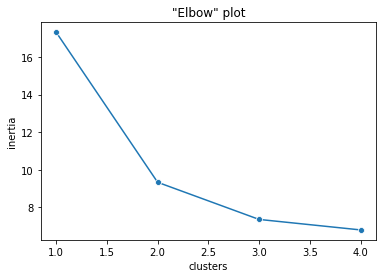

This is the inertia value list for each number of clusters k:

[17.312633442609815, 9.329732291408202, 7.352893195093407, 6.794718091068642]




Enter number of clusters k to run the k-means algorithm:
 3


Initial random centroids coordinates:


,Murder,Assault
36,0.246988,0.390411
46,0.192771,0.342466
7,0.307229,0.660959


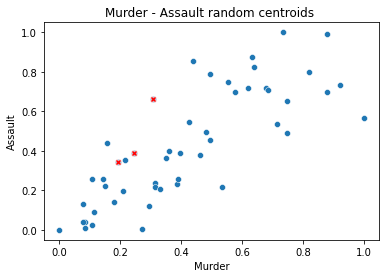


Iteration number 1 calculation results:


,Murder,Assault,dist_centr_0,dist_centr_1,dist_centr_2,min_dist
0,0.746988,0.654110,0.565276,0.635829,0.439812,dist_centr_2
1,0.554217,0.746575,0.470364,0.542169,0.261406,dist_centr_2
2,0.439759,0.852740,0.500908,0.566906,0.233118,dist_centr_2
3,0.481928,0.496575,0.257813,0.327660,0.239878,dist_centr_2
4,0.493976,0.791096,0.470693,0.540364,0.227618,dist_centr_2
5,0.427711,0.544521,0.237509,0.309876,0.167552,dist_centr_2
6,0.150602,0.222603,0.193519,0.127064,0.465498,dist_centr_1
7,0.307229,0.660959,0.277174,0.338435,0.000000,dist_centr_2
8,0.879518,0.993151,0.873722,0.946051,0.661715,dist_centr_2
9,1.000000,0.568493,0.773783,0.838276,0.698915,dist_centr_2



New centroids coordinates after iteration 1:


,Murder,Assault
min_dist,,
dist_centr_0,0.378313,0.352740
dist_centr_1,0.172479,0.152848
dist_centr_2,0.666093,0.719178


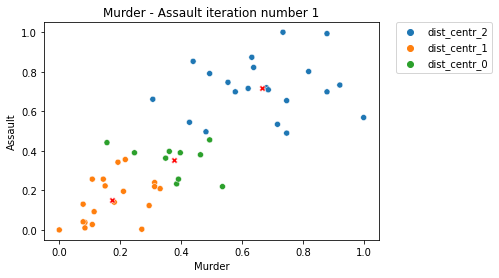


Iteration number 2 calculation results:


,Murder,Assault,dist_centr_0,dist_centr_1,dist_centr_2,min_dist
0,0.746988,0.654110,0.476177,0.762446,0.103817,dist_centr_2
1,0.554217,0.746575,0.431333,0.705858,0.115182,dist_centr_2
2,0.439759,0.852740,0.503761,0.749191,0.262804,dist_centr_2
3,0.481928,0.496575,0.177270,0.462501,0.288910,dist_centr_0
4,0.493976,0.791096,0.453359,0.714647,0.186538,dist_centr_2
5,0.427711,0.544521,0.198040,0.467494,0.295519,dist_centr_0
6,0.150602,0.222603,0.262274,0.073105,0.715764,dist_centr_1
7,0.307229,0.660959,0.316310,0.525675,0.363556,dist_centr_0
8,0.879518,0.993151,0.813224,1.098186,0.347291,dist_centr_2
9,1.000000,0.568493,0.658061,0.926041,0.366333,dist_centr_2



New centroids coordinates after iteration 2:


,Murder,Assault
min_dist,,
dist_centr_0,0.353748,0.366438
dist_centr_1,0.136403,0.109834
dist_centr_2,0.709505,0.744482


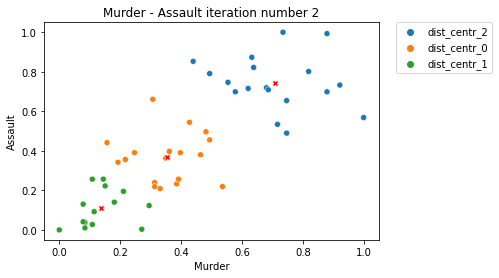


Iteration number 3 calculation results:


,Murder,Assault,dist_centr_0,dist_centr_1,dist_centr_2,min_dist
0,0.746988,0.654110,0.487229,0.817955,0.097838,dist_centr_2
1,0.554217,0.746575,0.429758,0.761583,0.155302,dist_centr_2
2,0.439759,0.852740,0.493849,0.802455,0.290658,dist_centr_2
3,0.481928,0.496575,0.182663,0.518610,0.336525,dist_centr_0
4,0.493976,0.791096,0.447211,0.769400,0.220512,dist_centr_2
5,0.427711,0.544521,0.192831,0.523272,0.345532,dist_centr_0
6,0.150602,0.222603,0.248912,0.113660,0.764677,dist_centr_1
7,0.307229,0.660959,0.298172,0.576993,0.410855,dist_centr_0
8,0.879518,0.993151,0.818048,1.154326,0.301232,dist_centr_2
9,1.000000,0.568493,0.677102,0.977839,0.339647,dist_centr_2



New centroids coordinates after iteration 3:


,Murder,Assault
min_dist,,
dist_centr_0,0.353748,0.366438
dist_centr_1,0.136403,0.109834
dist_centr_2,0.709505,0.744482


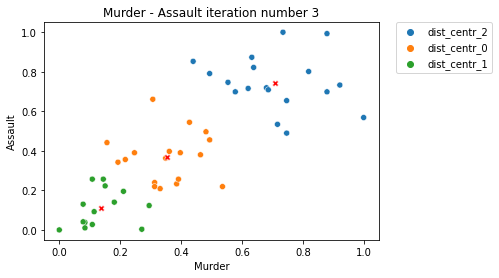

Converged at iteration 2


In [6]:
ask = input('Would you like to run the inertia calculation for diferent values of "k"? ("elbow" plot) (yes/no) \n')

if ask in ['yes', 'Yes', 'Y', 'y', 'YES']:
    inertia()
    print('\n')
    k_means()
else: 
    k_means()